# Clusterización / Algoritmo K-means (Core)
El algoritmo K-means es uno de los métodos de agrupamiento más utilizados en análisis de datos y machine learning. Este algoritmo busca agrupar un conjunto de datos en K grupos o clusters, donde cada grupo está definido por un centroide. En esta actividad, utilizaremos el algoritmo K-means para analizar y segmentar clientes en función de su comportamiento de compra, utilizando el dataset «Mall Customer Segmentation Data» de Kaggle.

Enlace al dataset: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python



Objetivo de la Actividad

El objetivo de esta actividad es utilizar el algoritmo K-means para identificar diferentes grupos de clientes según su comportamiento de compra. El análisis de los clusters resultantes permitirá obtener una mejor comprensión de las características de los clientes, lo que puede ser útil para personalizar estrategias de marketing y mejorar la experiencia del cliente.



Descripción del Algoritmo K-means

K-means es un algoritmo de aprendizaje no supervisado que agrupa datos en K clusters o grupos, donde K es un número predefinido. Cada cluster se representa mediante un centroide, que es el promedio de todos los puntos de datos en ese grupo. El algoritmo tiene dos fases principales:

1. Asignación de clusters: Cada punto de datos se asigna al centroide más cercano.
2. Actualización de centroides: Se recalcula la posición de los centroides basándose en la media de los puntos de datos asignados a cada cluster.

Este proceso se repite hasta que los centroides no cambian significativamente o se alcanza un número máximo de iteraciones.



Instrucciones

1. Carga del Dataset:
- El dataset contiene información sobre clientes de un centro comercial, como su género, edad, ingresos anuales y puntaje de gasto.
- Utiliza el archivo «Mall_Customers.csv» y cárgalo en tu entorno de trabajo.

2. Selección de Variables:
- Para este análisis, selecciona las variables ‘Annual Income (k$)’ y ‘Spending Score (1-100)’, ya que representan características importantes relacionadas con el comportamiento de compra.

3. Implementación de K-means:
- Aplica el algoritmo K-means utilizando diferentes valores de K (por ejemplo, K = 3, 4, 5) y observa cómo se agrupan los clientes.
- Visualiza los resultados utilizando gráficos de dispersión que representen los clusters y los centroides.

4. Elbow Method:
- Utiliza el método del codo para identificar el número óptimo de clusters. Este método consiste en ejecutar K-means con diferentes valores de K y calcular la suma de errores cuadráticos (SSE). El valor óptimo de K se encuentra donde se produce una disminución significativa en el SSE.

5. Interpretación de Clusters:
- Una vez obtenidos los clusters, analiza cada grupo. ¿Qué características tienen en común los clientes de cada cluster? ¿Cómo podrías usar esta información para diseñar estrategias de marketing personalizadas?

6. Análisis de Resultados:
- Discute los resultados obtenidos. ¿Qué insights se pueden extraer de los grupos de clientes identificados? ¿Existen patrones o comportamientos comunes?


Expansión del Algoritmo y Aplicaciones

El algoritmo K-means tiene una amplia gama de aplicaciones en diversas industrias. Algunos ejemplos incluyen:

- Segmentación de Clientes: Agrupar a los clientes según su comportamiento de compra o interacción con un producto.
- Compresión de Imágenes: Reducir el número de colores en una imagen agrupando píxeles similares.
- Agrupación de Documentos: Clasificar documentos en función de su similitud textual.

En esta actividad, el enfoque está en la segmentación de clientes para un centro comercial, pero el mismo algoritmo puede aplicarse a otros dominios como la biología, el procesamiento de señales y la detección de anomalías.

In [1]:
import pandas as pd
df = pd.read_csv('/Users/mathiorti/Desktop/Me/Cursos/Data Analisis and Machine Learning/Data Sets/Mall_Customers.csv')
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


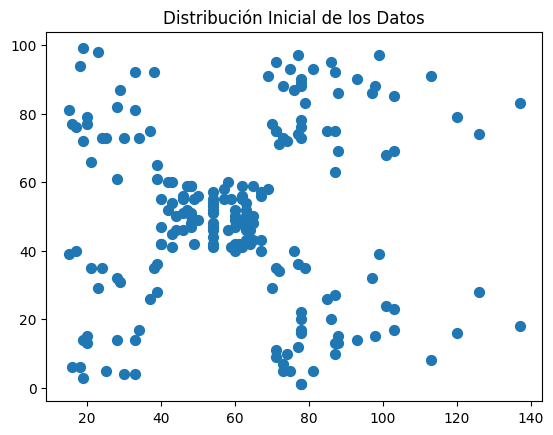

In [4]:
# Visualización inicial de los datos
import matplotlib.pyplot as plt
import numpy as np

X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Distribución Inicial de los Datos")
plt.show()

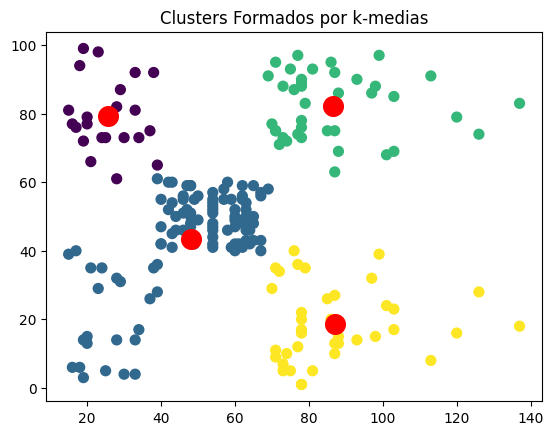

In [5]:
from sklearn.cluster import KMeans

# Aplicar k-medias con 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Visualizar los clusters resultantes
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
plt.title("Clusters Formados por k-medias")
plt.show()

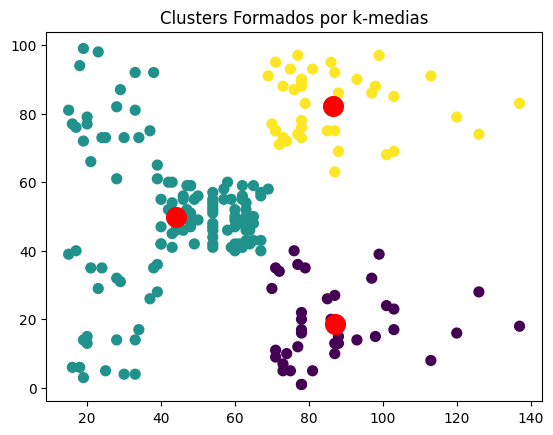

In [6]:
#Ahora lo hago con diferentes valores de k
# Aplicar k-medias con 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Visualizar los clusters resultantes
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
plt.title("Clusters Formados por k-medias")
plt.show()

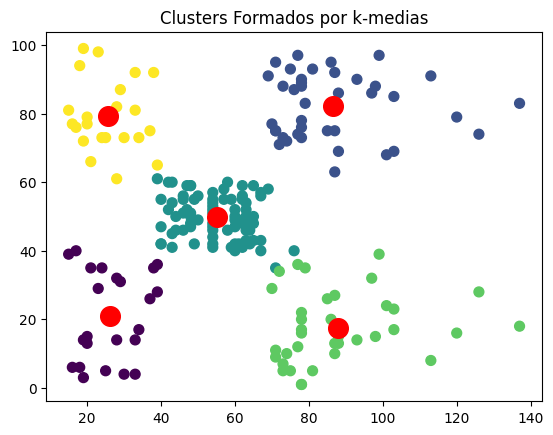

In [7]:
# Aplicar k-medias con 5 clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Visualizar los clusters resultantes
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red')
plt.title("Clusters Formados por k-medias")
plt.show()

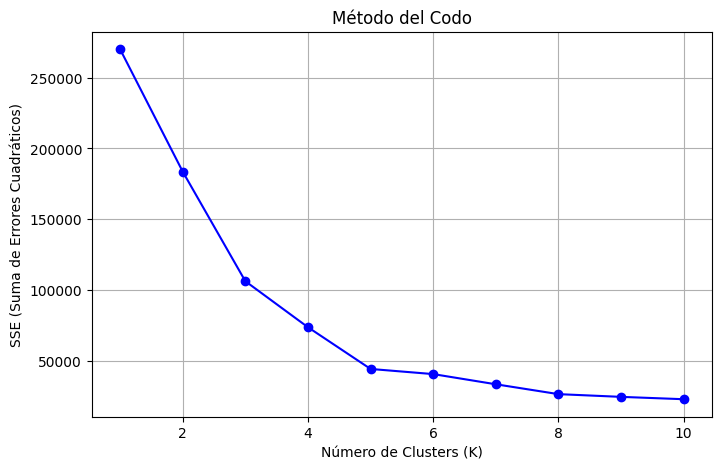

In [8]:
#Aplico ahora el método del codo
sse = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_) #Inertia es a suma de los errores cuadráticos

#Grafico del método
plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o', linestyle='-', color='blue')
plt.title("Método del Codo")
plt.xlabel("Número de Clusters (K)")
plt.ylabel("SSE (Suma de Errores Cuadráticos)")
plt.grid(True)
plt.show()

In [ ]:
#La mejor k es donde la curva se dobla de manera más pronunciada. En este caso, 4. 
# mejor k = 4

# Conclusión

Analizando cada cluster, se puede identificar patrones para diseñar estrategias personalizadas.

En el cluster 1 lo que tengo en comun es ingresos bajos.

En el 2 tengo ingresos altos.

En el 3 ingresos medios

En el 4 ingresos altos.

En el 5 ingresos bajos.

Con este amálisis puedo identificar segmentos de los clientes que tienen unas características comunes. Son muy importantes para campañas de marketing, para optimizar recursos y para mejorar la satisfacción del cliente.
